In [2]:
import pandas as pd
import numpy as np

In [92]:
data = pd.read_excel("auto_complectations.xlsx")

In [93]:
data.head()

,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,...,Разгон до сотни,Максимальная скорость,Расход топлива (л/100 км)\nгород / трасса / смешанный,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
0,Audi,A3 Sedan,1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
2,Audi,A3 Sedan,2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.8 секунды,250 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.2 секунды,242 км/ч,7.2 / 4.8 / 5.7,165 мм,4458 × 1796 × 1416,2637 мм,390 л,845 л,55 л,1465 кг
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.8 секунды,242 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг


## Задание
Вам предлагается набор данных, содержащий комплектации различных моделей автомобилей и их характеристики.Мы предлагаем произвести с данным датасетом следующие операции: 1. Анализ данных, 2. Фильтрация, 3. Преобразование переменных, 4. Классификация моделей по типу кузова (без подклассов, колонка type_car): - Седан - Хетчбек - Кроссовер - Внедорожник. Обосновать выбранный подход/метод машинного обучения. Описать способ оценки качества модели машинного обучения.

### 1. Анализ данных

In [94]:
data.shape

(1703, 21)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 21 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   brand                                                 1703 non-null   object
 1   model                                                 1703 non-null   object
 2   complect                                              1703 non-null   object
 3   type_car                                              1703 non-null   object
 4   seats                                                 1703 non-null   int64 
 5   doors                                                 1703 non-null   int64 
 6   Двигатель                                             1703 non-null   object
 7   Мощность                                              1703 non-null   object
 8   Крутящий момент двигателя                             1703 non-null 

In [96]:
data.describe()

,seats,doors
count,1703.000000,1703.000000
mean,5.079272,4.887845
std,0.677096,1.024259
min,1.000000,2.000000
25%,5.000000,4.000000
50%,5.000000,5.000000
75%,5.000000,5.000000
max,9.000000,8.000000


Здесь у нас лишь две колонки, так как в остальных колонках числовые значения записаны вместе с единицей измерения

In [97]:
data.isna().any()

brand                                                    False
model                                                    False
complect                                                 False
type_car                                                 False
seats                                                    False
doors                                                    False
Двигатель                                                False
Мощность                                                 False
Крутящий момент двигателя                                False
Коробка передач                                          False
Привод                                                   False
Разгон до сотни                                          False
Максимальная скорость                                    False
Расход топлива (л/100 км)\nгород / трасса / смешанный    False
Дорожный просвет                                         False
Габариты (длина × ширина × высота)                     

На данный момент у нас нет пропусков в значениях

In [98]:
data['type_car'].value_counts()

Компактный кроссовер                          379
Среднеразмерный кроссовер                     236
Большой внедорожник                           129
Большой кроссовер                             115
Седан класса E                                104
Седан класса D                                 93
Седан класса B                                 91
Седан класса F                                 68
Вэн                                            53
Седан класса C                                 53
Хэтчбек класса B                               40
Компактвэн                                     39
Среднеразмерный внедорожник                    30
Хэтчбек класса C                               29
Хэтчбек класса D                               26
Пикап                                          26
Кроссовер класса B                             24
Хэтчбек класса E                               20
Универсал класса E                             16
Купе класса D                                  16


In [99]:
data.loc[0]

brand                                                                             Audi
model                                                                         A3 Sedan
complect                                                                 1.4 TFSI 7AMT
type_car                                                                Седан класса C
seats                                                                                5
doors                                                                                4
Двигатель                                                        бензиновый (1395 см³)
Мощность                                                                     150 л. с.
Крутящий момент двигателя                                                      250 Н·м
Коробка передач                                          роботизированная (7 ступеней)
Привод                                                                        передний
Разгон до сотни                            

### 2. Фильтрация данных
Если перед нами стоит задача определить класс автомобиля по типу кузова, то, по логике, нас должны интересеовать лишь признаки, как-то коррелирующие с размером самого авто.

Поэтому оставим лишь следующие признаки
`seats`, `doors`, `Дорожный просвет`, `Габариты`, `Колёснаябаза`, `Объём багажника`, `Объём багажника максимальный`, `Масса авто`

In [100]:
slice = data.loc[:, ['seats', 'type_car', 'doors', 'Дорожный просвет', 'Габариты (длина × ширина × высота)', 
             'Колёсная база', 'Объём багажника', 'Объём багажника максимальный', 'Масса автомобиля']]

In [101]:
df = pd.DataFrame(slice)

In [102]:
df

,seats,type_car,doors,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Масса автомобиля
0,5,Седан класса C,4,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,1320 кг
1,5,Седан класса C,4,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,1320 кг
2,5,Седан класса C,4,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,1395 кг
3,5,Седан класса C,4,165 мм,4458 × 1796 × 1416,2637 мм,390 л,845 л,1465 кг
4,5,Седан класса C,4,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,1395 кг
...,...,...,...,...,...,...,...,...,...
1698,5,Большой кроссовер,5,237 мм,4950 × 2008 × 1776,2984 мм,721 л,1899 л,1969 кг
1699,7,Большой кроссовер,5,237 мм,4950 × 2008 × 1776,2984 мм,692 л,1899 л,2004 кг
1700,7,Большой кроссовер,5,237 мм,4950 × 2008 × 1776,2984 мм,692 л,1899 л,2009 кг
1701,7,Большой кроссовер,5,237 мм,4950 × 2008 × 1776,2984 мм,640 л,1899 л,2350 кг


Нам нужно изменить столбцы
- `Дорожный просвет` убрать единицы измерения
- `Габариты` поменять на 3 колонки `Длина`, `Ширина` и `Высота`
- Для `Колёсной базы`, `Объёма багажника`, `Макс. объёма багажника`, и `Массы авто.` убрать единицы измерения

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

### 3. Преобразование переменных
И работа с "выбросами"

In [104]:
df['Дорожный просвет'].str.contains('мм').all()

True

In [105]:
df['Колёсная база'].str.contains('мм').all()

True

Во всех строках Lорожный просвет и Колёсная база измеряются в мм

In [106]:
df['Объём багажника'].str.contains('л').all()

True

In [107]:
df['Объём багажника максимальный'].str.contains('л').all()

True

In [108]:
df['Масса автомобиля'].str.contains('кг').all()

True

Объём багажника тоже измеряется только в литрах, масса - в кг

In [109]:
def del_units(x):
    x = x.split()[0]
    return int(x)

In [110]:
cols_tochange = ['Дорожный просвет', 'Колёсная база', 'Объём багажника', 'Объём багажника максимальный', 'Масса автомобиля']

In [111]:
for i in cols_tochange:
    df[i] = df[i].map(del_units)

In [112]:
df.head()

,seats,type_car,doors,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Масса автомобиля
0,5,Седан класса C,4,165,4458 × 1796 × 1416,2637,425,880,1320
1,5,Седан класса C,4,165,4458 × 1796 × 1416,2637,425,880,1320
2,5,Седан класса C,4,165,4458 × 1796 × 1416,2637,425,880,1395
3,5,Седан класса C,4,165,4458 × 1796 × 1416,2637,390,845,1465
4,5,Седан класса C,4,165,4458 × 1796 × 1416,2637,425,880,1395


In [113]:
def split_dims(col):
    dimensions = col.str.split()
    length = [int(i[0]) for i in dimensions]
    width = [int(i[2]) for i in dimensions]
    height = [int(i[4]) for i in dimensions]
    return length, width, height

In [114]:
df['Длина'], df['Ширина'], df['Высота'] = split_dims(df['Габариты (длина × ширина × высота)'])

In [115]:
df.head()

,seats,type_car,doors,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Масса автомобиля,Длина,Ширина,Высота
0,5,Седан класса C,4,165,4458 × 1796 × 1416,2637,425,880,1320,4458,1796,1416
1,5,Седан класса C,4,165,4458 × 1796 × 1416,2637,425,880,1320,4458,1796,1416
2,5,Седан класса C,4,165,4458 × 1796 × 1416,2637,425,880,1395,4458,1796,1416
3,5,Седан класса C,4,165,4458 × 1796 × 1416,2637,390,845,1465,4458,1796,1416
4,5,Седан класса C,4,165,4458 × 1796 × 1416,2637,425,880,1395,4458,1796,1416


In [116]:
df = pd.DataFrame(df.drop('Габариты (длина × ширина × высота)', axis=1))

In [117]:
df.head()

,seats,type_car,doors,Дорожный просвет,Колёсная база,Объём багажника,Объём багажника максимальный,Масса автомобиля,Длина,Ширина,Высота
0,5,Седан класса C,4,165,2637,425,880,1320,4458,1796,1416
1,5,Седан класса C,4,165,2637,425,880,1320,4458,1796,1416
2,5,Седан класса C,4,165,2637,425,880,1395,4458,1796,1416
3,5,Седан класса C,4,165,2637,390,845,1465,4458,1796,1416
4,5,Седан класса C,4,165,2637,425,880,1395,4458,1796,1416


In [118]:
df.dtypes

seats                            int64
type_car                        object
doors                            int64
Дорожный просвет                 int64
Колёсная база                    int64
Объём багажника                  int64
Объём багажника максимальный     int64
Масса автомобиля                 int64
Длина                            int64
Ширина                           int64
Высота                           int64
dtype: object

###### Посмотрим на распределение значений

<AxesSubplot:xlabel='Дорожный просвет', ylabel='Count'>

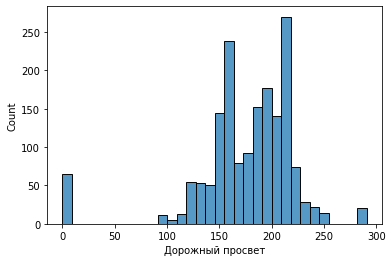

In [119]:
sns.histplot(df, x='Дорожный просвет')

<AxesSubplot:xlabel='Колёсная база', ylabel='Count'>

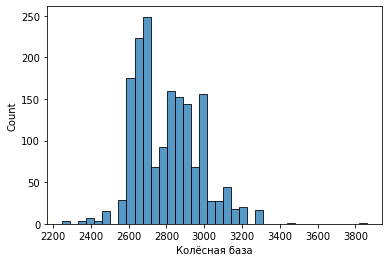

In [120]:
sns.histplot(df, x='Колёсная база')

<AxesSubplot:xlabel='Объём багажника', ylabel='Count'>

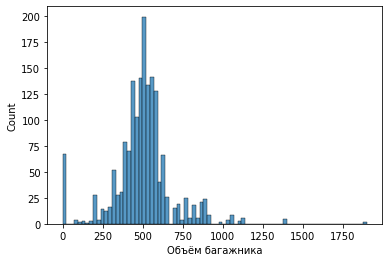

In [121]:
sns.histplot(data=df, x='Объём багажника')

<AxesSubplot:xlabel='Объём багажника максимальный', ylabel='Count'>

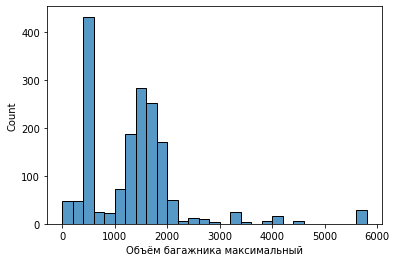

In [122]:
sns.histplot(df, x='Объём багажника максимальный')

<AxesSubplot:xlabel='Масса автомобиля', ylabel='Count'>

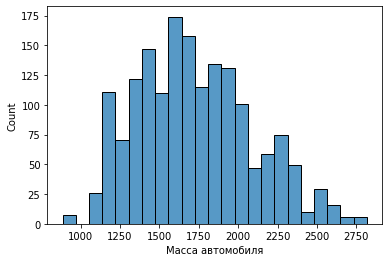

In [123]:
sns.histplot(df, x='Масса автомобиля')

<AxesSubplot:xlabel='Длина', ylabel='Count'>

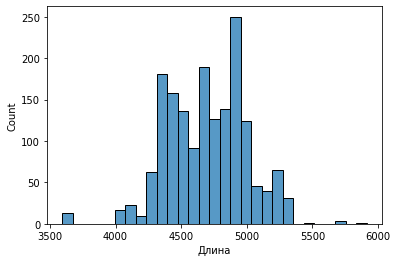

In [124]:
sns.histplot(df, x='Длина')

<AxesSubplot:xlabel='Ширина', ylabel='Count'>

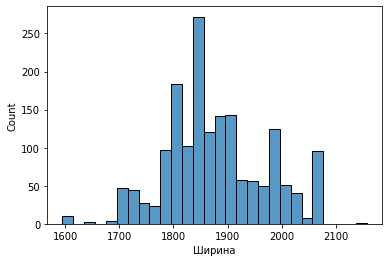

In [125]:
sns.histplot(df, x='Ширина')

<AxesSubplot:xlabel='Высота', ylabel='Count'>

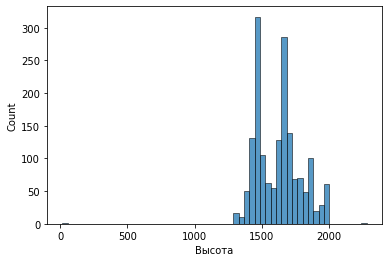

In [205]:
sns.histplot(df, x='Высота')

###### Уберём нули из значений объёма багажнкиа

In [127]:
len(df[df['Объём багажника максимальный'] == 0])

42

In [128]:
df.loc[df['Объём багажника'] > df['Объём багажника максимальный']]

,seats,type_car,doors,Дорожный просвет,Колёсная база,Объём багажника,Объём багажника максимальный,Масса автомобиля,Длина,Ширина,Высота
969,5,Компактный кроссовер,5,160,2640,272,0,1460,4495,1840,1540
970,5,Компактный кроссовер,5,160,2640,272,0,1460,4495,1840,1540
971,5,Компактный кроссовер,5,160,2640,272,0,1460,4495,1840,1540
972,5,Компактный кроссовер,5,160,2640,272,0,1460,4495,1840,1540
973,5,Компактный кроссовер,5,160,2640,272,0,1600,4495,1840,1540
974,5,Компактный кроссовер,5,160,2640,272,0,1600,4495,1840,1540
975,5,Компактный кроссовер,5,160,2640,272,0,1600,4495,1840,1540


In [129]:
df.loc[df['Объём багажника'] > df['Объём багажника максимальный'], 'Объём багажника максимальный'] = df.loc[df['Объём багажника'] > df['Объём багажника максимальный'], 'Объём багажника']

In [130]:
df.loc[df['Объём багажника'] == 0, 'Объём багажника'] = df.loc[df['Объём багажника'] == 0, 'Объём багажника максимальный']

In [228]:
df.loc[df['Объём багажника'] == 0, 'Объём багажника']

1082    0.0
1083    0.0
1084    0.0
1085    0.0
1086    0.0
       ... 
1483    0.0
1484    0.0
1485    0.0
1486    0.0
1487    0.0
Name: Объём багажника, Length: 26, dtype: float64

In [229]:
df.loc[df['Объём багажника'] == 0, 'Объём багажника максимальный']

1082    0.0
1083    0.0
1084    0.0
1085    0.0
1086    0.0
       ... 
1483    0.0
1484    0.0
1485    0.0
1486    0.0
1487    0.0
Name: Объём багажника максимальный, Length: 26, dtype: float64

Заполним значения багажника равные 0 теми, которые отмечены в значении макс. объёма багажника, и наоборот

Теперь у нас остались лишь машины где в обоих графах багажника объём = 0  
Таких машин всего два вида: 
- Седан класса Е 
- Пикапы
- 1 спорткупе

In [131]:
df.loc[df['Объём багажника'] == 0]

,seats,type_car,doors,Дорожный просвет,Колёсная база,Объём багажника,Объём багажника максимальный,Масса автомобиля,Длина,Ширина,Высота
920,5,Седан класса E,4,153,2870,0,0,1700,4975,1865,1445
921,5,Седан класса E,4,154,2870,0,0,1695,4975,1865,1445
922,5,Седан класса E,4,154,2870,0,0,1695,4975,1865,1445
923,5,Седан класса E,4,154,2870,0,0,1695,4975,1865,1445
924,5,Седан класса E,4,154,2870,0,0,1695,4975,1865,1445
925,5,Седан класса E,4,150,2870,0,0,1725,4975,1865,1445
926,5,Седан класса E,4,154,2870,0,0,1695,4975,1865,1445
927,5,Седан класса E,4,150,2870,0,0,1725,4975,1865,1445
932,4,Спорткупе,2,133,2870,0,0,1935,4770,1920,1345
1082,5,Пикап,4,222,3150,0,0,2167,5340,1920,1819


Возможно это просто машины, у которых нет багажника

In [132]:
df[df['type_car'] == 'Спорткупе']

,seats,type_car,doors,Дорожный просвет,Колёсная база,Объём багажника,Объём багажника максимальный,Масса автомобиля,Длина,Ширина,Высота
209,4,Спорткупе,2,128,2822,420,420,1905,4851,1902,1346
210,4,Спорткупе,2,128,2822,420,420,1845,4851,1902,1346
211,4,Спорткупе,2,128,2822,420,420,1965,4851,1902,1346
221,4,Спорткупе,2,123,2693,390,390,1625,4461,1854,1410
222,4,Спорткупе,2,123,2693,390,390,1650,4461,1854,1410
223,4,Спорткупе,2,123,2693,390,390,1625,4461,1854,1410
224,4,Спорткупе,2,123,2693,390,390,1650,4461,1854,1410
232,4,Спорткупе,2,128,2827,420,420,1960,4867,1907,1362
233,4,Спорткупе,2,128,2827,420,420,1960,4867,1907,1362
535,2,Спорткупе,2,100,2622,336,509,1525,4470,1923,1311


Добавим вместо нулей средние значения по спорткупе

In [133]:
df.loc[(df['type_car']=='Спорткупе')&(df['Объём багажника'] == 0)]['Объём багажника'].index

Int64Index([932], dtype='int64')

In [134]:
ind = df.loc[(df['type_car']=='Спорткупе')&(df['Объём багажника'] == 0)]['Объём багажника'].index

In [136]:
df.loc[ind, 'Объём багажника']

932    0
Name: Объём багажника, dtype: int64

In [140]:
df.loc[ind, 'Объём багажника'] = df.loc[df['Объём багажника'] != 0].loc[df['type_car']=='Спорткупе', 'Объём багажника'].mean()

In [141]:
df.loc[ind, 'Объём багажника']

932    379.333333
Name: Объём багажника, dtype: float64

In [142]:
df.loc[ind, 'Объём багажника максимальный'] = df.loc[df['Объём багажника максимальный'] != 0].loc[df['type_car']=='Спорткупе', 'Объём багажника максимальный'].mean()

In [143]:
df.loc[ind, 'Объём багажника максимальный']

932    437
Name: Объём багажника максимальный, dtype: int64

<AxesSubplot:>

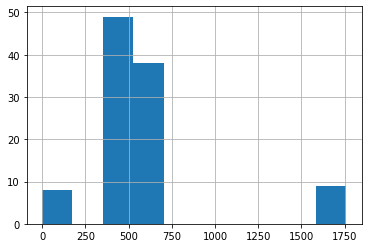

In [139]:
df[df['type_car'] == 'Седан класса E']['Объём багажника максимальный'].hist()

<AxesSubplot:>

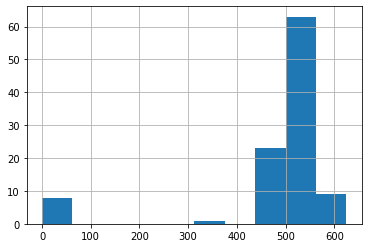

In [144]:
df[df['type_car'] == 'Седан класса E']['Объём багажника'].hist()

In [149]:
df.loc[df['type_car']=='Седан класса E', 'Объём багажника'].loc[df['Объём багажника'] == 0]

920    0.0
921    0.0
922    0.0
923    0.0
924    0.0
925    0.0
926    0.0
927    0.0
Name: Объём багажника, dtype: float64

In [148]:
df.loc[df['type_car']=='Седан класса E'].loc[df['Объём багажника максимальный'] == 0]

,seats,type_car,doors,Дорожный просвет,Колёсная база,Объём багажника,Объём багажника максимальный,Масса автомобиля,Длина,Ширина,Высота
920,5,Седан класса E,4,153,2870,0.0,0,1700,4975,1865,1445
921,5,Седан класса E,4,154,2870,0.0,0,1695,4975,1865,1445
922,5,Седан класса E,4,154,2870,0.0,0,1695,4975,1865,1445
923,5,Седан класса E,4,154,2870,0.0,0,1695,4975,1865,1445
924,5,Седан класса E,4,154,2870,0.0,0,1695,4975,1865,1445
925,5,Седан класса E,4,150,2870,0.0,0,1725,4975,1865,1445
926,5,Седан класса E,4,154,2870,0.0,0,1695,4975,1865,1445
927,5,Седан класса E,4,150,2870,0.0,0,1725,4975,1865,1445


In [151]:
df.loc[df['type_car']=='Седан класса E', 'Объём багажника'].loc[df['Объём багажника'] != 0].mean()

520.1770833333334

In [163]:
ind = df.loc[df['type_car']=='Седан класса E', 'Объём багажника'].loc[df['Объём багажника'] == 0].index

In [164]:
df.loc[ind, 'Объём багажника'] = \
df.loc[df['type_car']=='Седан класса E', 'Объём багажника'].loc[df['Объём багажника'] != 0].mean()

In [165]:
df.loc[df['type_car']=='Седан класса E', 'Объём багажника'].loc[df['Объём багажника'] != 0]

58      530.0
59      530.0
60      530.0
61      530.0
62      530.0
        ...  
1642    500.0
1643    500.0
1644    500.0
1645    500.0
1646    500.0
Name: Объём багажника, Length: 104, dtype: float64

In [166]:
df.loc[ind, 'Объём багажника']

920    520.177083
921    520.177083
922    520.177083
923    520.177083
924    520.177083
925    520.177083
926    520.177083
927    520.177083
Name: Объём багажника, dtype: float64

In [167]:
ind = df.loc[df['type_car']=='Седан класса E', 'Объём багажника максимальный'].loc[df['Объём багажника максимальный'] == 0].index

In [168]:
df.loc[ind, 'Объём багажника максимальный'] = \
df.loc[df['type_car']=='Седан класса E', 'Объём багажника максимальный'].loc[df['Объём багажника максимальный'] != 0].mean()

In [169]:
df.loc[ind, 'Объём багажника максимальный']

920    629.5
921    629.5
922    629.5
923    629.5
924    629.5
925    629.5
926    629.5
927    629.5
Name: Объём багажника максимальный, dtype: float64

У седанов есть багажник, тогда пустующим значениям поставим средние по данному типу машин

In [170]:
df[df['Объём багажника'] == 0]

,seats,type_car,doors,Дорожный просвет,Колёсная база,Объём багажника,Объём багажника максимальный,Масса автомобиля,Длина,Ширина,Высота
1082,5,Пикап,4,222,3150,0.0,0.0,2167,5340,1920,1819
1083,5,Пикап,4,222,3150,0.0,0.0,2193,5340,1920,1819
1084,5,Пикап,4,222,3150,0.0,0.0,2193,5340,1920,1819
1085,5,Пикап,4,222,3150,0.0,0.0,2249,5340,1920,1819
1086,5,Пикап,4,222,3150,0.0,0.0,2249,5340,1920,1819
1094,5,Пикап,4,200,3000,0.0,0.0,1930,5225,1815,1775
1095,5,Пикап,4,200,3000,0.0,0.0,1930,5225,1815,1775
1096,5,Пикап,4,220,3000,0.0,0.0,1930,5225,1815,1795
1097,5,Пикап,4,220,3000,0.0,0.0,1930,5225,1815,1795
1098,5,Пикап,4,220,3000,0.0,0.0,1930,5225,1815,1795


У нас остались только пикапы

<AxesSubplot:>

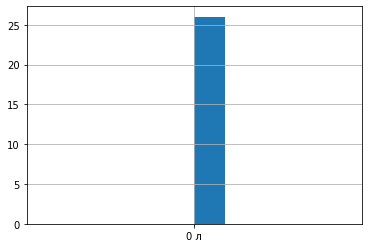

In [64]:
data[data['type_car'] == 'Пикап']['Объём багажника максимальный'].hist()

Но у них у всех отсутствует багажник. В будущем задумаемся о том использовать ли этот признак при определении класса автомобиля, учитывая, что у нас не будет класса "Пикапы"

Судя по гистограммам, нулевуе значения есть еще у высоты и дорожного просвета

In [171]:
df[df['Дорожный просвет'] == 0]

,seats,type_car,doors,Дорожный просвет,Колёсная база,Объём багажника,Объём багажника максимальный,Масса автомобиля,Длина,Ширина,Высота
58,5,Седан класса E,4,0,2924,530.0,530.0,1680,4933,1886,1457
59,5,Седан класса E,4,0,2924,530.0,530.0,1710,4933,1886,1457
60,5,Седан класса E,4,0,2924,530.0,530.0,1680,4933,1886,1457
61,5,Седан класса E,4,0,2924,530.0,530.0,1710,4933,1886,1457
62,5,Седан класса E,4,0,2924,530.0,530.0,1770,4933,1886,1457
...,...,...,...,...,...,...,...,...,...,...,...
1073,5,Большой внедорожник,5,0,3135,520.0,2400.0,2785,5205,2157,1838
1078,7,Вэн,4,0,3200,1030.0,1030.0,2075,5140,1928,1880
1079,7,Вэн,4,0,3200,1030.0,1030.0,2145,5140,1928,1880
1080,7,Вэн,5,0,3200,1030.0,1030.0,2075,5140,1928,1880


In [187]:
pd.set_option('display.max_rows', 10)

In [188]:
df.loc[df['Дорожный просвет'] ==0, 'type_car'].unique()

array(['Седан класса E', 'Универсал класса E', 'Большой кроссовер',
       'Хэтчбек класса E', 'Хэтчбек класса C', 'Горячий хэтчбек класса C',
       'Седан класса C', 'Купе класса E', 'Большой внедорожник', 'Вэн'],
      dtype=object)

In [186]:
ind = df.loc[(df['Дорожный просвет'] ==0) & (df['type_car']=='Универсал класса E')].index

In [191]:
df.loc[ind, 'Дорожный просвет'] = \
df.loc[df['type_car']=='Универсал класса E', 'Дорожный просвет'].loc[df['Дорожный просвет'] != 0].mean()

In [192]:
df.loc[df['Дорожный просвет'] ==0, 'type_car'].unique()

array(['Седан класса E', 'Большой кроссовер', 'Хэтчбек класса E',
       'Хэтчбек класса C', 'Горячий хэтчбек класса C', 'Седан класса C',
       'Купе класса E', 'Большой внедорожник', 'Вэн'], dtype=object)

In [193]:
ind = df.loc[(df['Дорожный просвет'] ==0) & (df['type_car']=='Седан класса E')].index
df.loc[ind, 'Дорожный просвет'] = \
df.loc[df['type_car']=='Седан класса E', 'Дорожный просвет'].loc[df['Дорожный просвет'] != 0].mean()

df.loc[df['Дорожный просвет'] ==0, 'type_car'].unique()

array(['Большой кроссовер', 'Хэтчбек класса E', 'Хэтчбек класса C',
       'Горячий хэтчбек класса C', 'Седан класса C', 'Купе класса E',
       'Большой внедорожник', 'Вэн'], dtype=object)

In [194]:
ind = df.loc[(df['Дорожный просвет'] ==0) & (df['type_car']=='Седан класса C')].index
df.loc[ind, 'Дорожный просвет'] = \
df.loc[df['type_car']=='Седан класса C', 'Дорожный просвет'].loc[df['Дорожный просвет'] != 0].mean()

df.loc[df['Дорожный просвет'] ==0, 'type_car'].unique()

array(['Большой кроссовер', 'Хэтчбек класса E', 'Хэтчбек класса C',
       'Горячий хэтчбек класса C', 'Купе класса E', 'Большой внедорожник',
       'Вэн'], dtype=object)

In [195]:
ind = df.loc[(df['Дорожный просвет'] ==0) & (df['type_car']=='Большой кроссовер')].index
df.loc[ind, 'Дорожный просвет'] = \
df.loc[df['type_car']=='Большой кроссовер', 'Дорожный просвет'].loc[df['Дорожный просвет'] != 0].mean()

df.loc[df['Дорожный просвет'] ==0, 'type_car'].unique()

array(['Хэтчбек класса E', 'Хэтчбек класса C', 'Горячий хэтчбек класса C',
       'Купе класса E', 'Большой внедорожник', 'Вэн'], dtype=object)

In [196]:
ind = df.loc[(df['Дорожный просвет'] ==0) & (df['type_car']=='Хэтчбек класса E')].index
df.loc[ind, 'Дорожный просвет'] = \
df.loc[df['type_car']=='Хэтчбек класса E', 'Дорожный просвет'].loc[df['Дорожный просвет'] != 0].mean()

df.loc[df['Дорожный просвет'] ==0, 'type_car'].unique()

array(['Хэтчбек класса C', 'Горячий хэтчбек класса C', 'Купе класса E',
       'Большой внедорожник', 'Вэн'], dtype=object)

In [197]:
ind = df.loc[(df['Дорожный просвет'] ==0) & (df['type_car']=='Хэтчбек класса C')].index
df.loc[ind, 'Дорожный просвет'] = \
df.loc[df['type_car']=='Хэтчбек класса C', 'Дорожный просвет'].loc[df['Дорожный просвет'] != 0].mean()

df.loc[df['Дорожный просвет'] ==0, 'type_car'].unique()

array(['Горячий хэтчбек класса C', 'Купе класса E', 'Большой внедорожник',
       'Вэн'], dtype=object)

In [198]:
ind = df.loc[(df['Дорожный просвет'] ==0) & (df['type_car']=='Горячий хэтчбек класса C')].index
df.loc[ind, 'Дорожный просвет'] = \
df.loc[df['type_car']=='Горячий хэтчбек класса C', 'Дорожный просвет'].loc[df['Дорожный просвет'] != 0].mean()

df.loc[df['Дорожный просвет'] ==0, 'type_car'].unique()

array(['Купе класса E', 'Большой внедорожник', 'Вэн'], dtype=object)

In [199]:
ind = df.loc[(df['Дорожный просвет'] ==0) & (df['type_car']=='Купе класса E')].index
df.loc[ind, 'Дорожный просвет'] = \
df.loc[df['type_car']=='Купе класса E', 'Дорожный просвет'].loc[df['Дорожный просвет'] != 0].mean()

df.loc[df['Дорожный просвет'] ==0, 'type_car'].unique()

array(['Большой внедорожник', 'Вэн'], dtype=object)

In [201]:
ind = df.loc[(df['Дорожный просвет'] ==0) & (df['type_car']=='Большой внедорожник')].index
df.loc[ind, 'Дорожный просвет'] = \
df.loc[df['type_car']=='Большой внедорожник', 'Дорожный просвет'].loc[df['Дорожный просвет'] != 0].mean()

df.loc[df['Дорожный просвет'] ==0, 'type_car'].unique()

array(['Вэн'], dtype=object)

In [202]:
ind = df.loc[(df['Дорожный просвет'] ==0) & (df['type_car']=='Вэн')].index
df.loc[ind, 'Дорожный просвет'] = \
df.loc[df['type_car']=='Вэн', 'Дорожный просвет'].loc[df['Дорожный просвет'] != 0].mean()

df.loc[df['Дорожный просвет'] ==0, 'type_car'].unique()

array([], dtype=object)

<AxesSubplot:xlabel='Дорожный просвет', ylabel='Count'>

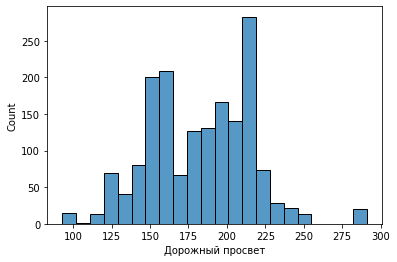

In [203]:
sns.histplot(df, x='Дорожный просвет')

И почистим высоту

In [206]:
df[df['Высота']< 100]

,seats,type_car,doors,Дорожный просвет,Колёсная база,Объём багажника,Объём багажника максимальный,Масса автомобиля,Длина,Ширина,Высота
1154,5,Среднеразмерный кроссовер,5,210.0,2705,550.0,1982.0,1445,4690,1820,17


Странно, что у автомобиля высота 17 мм

In [214]:
ind = df.loc[(df['Высота'] == 17) & (df['type_car']=='Среднеразмерный кроссовер')].index

In [215]:
df.loc[ind, 'Высота'] = df.loc[df['type_car']=='Среднеразмерный кроссовер', 'Высота'].mean()

In [216]:
df[df['Высота']< 100]

,seats,type_car,doors,Дорожный просвет,Колёсная база,Объём багажника,Объём багажника максимальный,Масса автомобиля,Длина,Ширина,Высота


Проверим оставшиеся аномалии

In [218]:
df.columns

Index(['seats', 'type_car', 'doors', 'Дорожный просвет', 'Колёсная база',
       'Объём багажника', 'Объём багажника максимальный', 'Масса автомобиля',
       'Длина', 'Ширина', 'Высота'],
      dtype='object')

<AxesSubplot:xlabel='Дорожный просвет', ylabel='Count'>

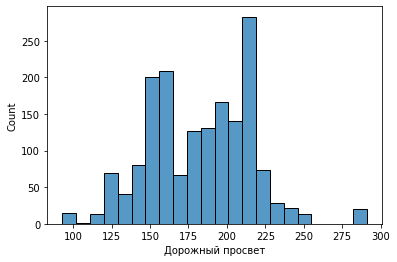

In [219]:
sns.histplot(df, x='Дорожный просвет')

<AxesSubplot:xlabel='Колёсная база', ylabel='Count'>

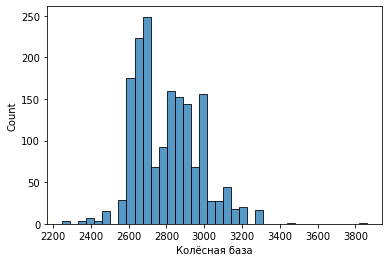

In [220]:
sns.histplot(df, x='Колёсная база')

In [224]:
data[df['Колёсная база']>3800]  # Похоже на норму, учитывая длину машины

,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,...,Разгон до сотни,Максимальная скорость,Расход топлива (л/100 км)\nгород / трасса / смешанный,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
1431,Toyota,Hiace,3.0D MT Standart,Вэн,1,3,дизельный (2755 см³),150 л. с.,420 Н·м,механическая (6 ступеней),...,нет данных,150 км/ч,0 / 0 / 0,185 мм,5915 × 1950 × 2280,3860 мм,0 л,1935 л,70 л,2125 кг


<AxesSubplot:xlabel='Объём багажника максимальный', ylabel='Count'>

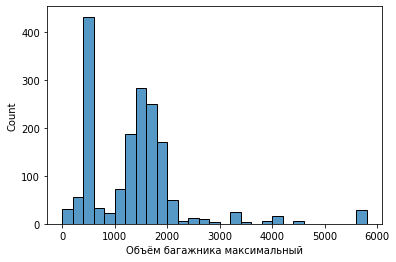

In [232]:
sns.histplot(df, x='Объём багажника максимальный')

In [233]:
data[df['Объём багажника максимальный'] > 5000]

,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,...,Разгон до сотни,Максимальная скорость,Расход топлива (л/100 км)\nгород / трасса / смешанный,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
1535,Volkswagen,Multivan,Trendline 2.0 TDI 102 hp 5MT,Вэн,5,4,дизельный (1968 см³),102 л. с.,250 Н·м,механическая (5 ступеней),...,нет данных,157 км/ч,9.5 / 6.1 / 7.3,193 мм,4904 × 1904 × 1970,3000 мм,0 л,5800 л,80 л,1976 кг
1536,Volkswagen,Multivan,Trendline 2.0 TSI 150 hp 6MT,Вэн,5,4,бензиновый (1984 см³),150 л. с.,280 Н·м,механическая (6 ступеней),...,нет данных,157 км/ч,12.8 / 7.8 / 9.6,193 мм,4904 × 1904 × 1970,3000 мм,0 л,5800 л,80 л,2007 кг
1537,Volkswagen,Multivan,Trendline 2.0 TDI 140 hp 6MT,Вэн,5,4,дизельный (1968 см³),140 л. с.,340 Н·м,механическая (6 ступеней),...,нет данных,173 км/ч,9.6 / 6.7 / 8,193 мм,4904 × 1904 × 1970,3000 мм,0 л,5800 л,80 л,1980 кг
1538,Volkswagen,Multivan,Trendline 2.0 TDI 140 hp 7AMT,Вэн,5,4,дизельный (1968 см³),140 л. с.,340 Н·м,роботизированная (7 ступеней),...,нет данных,172 км/ч,10.2 / 6.7 / 8,193 мм,4904 × 1904 × 1970,3000 мм,0 л,5800 л,80 л,2005 кг
1539,Volkswagen,Multivan,Comfortline 2.0 TSI 150 hp 6MT,Вэн,5,7,бензиновый (1984 см³),150 л. с.,280 Н·м,механическая (6 ступеней),...,нет данных,157 км/ч,12.8 / 7.8 / 9.6,193 мм,4904 × 1904 × 1970,3000 мм,0 л,5800 л,80 л,2007 кг
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,Volkswagen,Multivan,Highline 2.0 TSI 204 hp 7AMT,Вэн,5,7,бензиновый (1984 см³),204 л. с.,350 Н·м,роботизированная (7 ступеней),...,нет данных,202 км/ч,13.5 / 8.1 / 10.1,193 мм,4904 × 1904 × 1970,3000 мм,0 л,5800 л,80 л,2053 кг
1560,Volkswagen,Multivan,Highline 2.0 biTDI 180 7AMT 4Motion,Вэн,5,7,дизельный (1968 см³),180 л. с.,400 Н·м,роботизированная (7 ступеней),...,нет данных,188 км/ч,11.1 / 7.5 / 8.8,193 мм,4904 × 1904 × 1970,3000 мм,0 л,5800 л,80 л,2228 кг
1561,Volkswagen,Multivan,Highline 2.0 biTDI 204 hp 7AMT,Вэн,5,7,дизельный (1968 см³),204 л. с.,450 Н·м,роботизированная (7 ступеней),...,нет данных,203 км/ч,8 / 5.8 / 6.6,193 мм,4904 × 1904 × 1970,3000 мм,0 л,5800 л,80 л,2162 кг
1562,Volkswagen,Multivan,Highline 2.0 TSI 204 hp 7AMT 4Motion,Вэн,5,7,бензиновый (1984 см³),204 л. с.,350 Н·м,роботизированная (7 ступеней),...,нет данных,198 км/ч,14 / 8.5 / 10.5,193 мм,4904 × 1904 × 1970,3000 мм,0 л,5800 л,80 л,2163 кг


<AxesSubplot:xlabel='Масса автомобиля', ylabel='Count'>

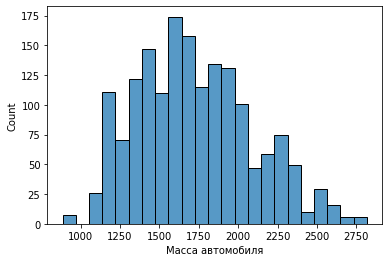

In [234]:
sns.histplot(df, x='Масса автомобиля')

<AxesSubplot:xlabel='Длина', ylabel='Count'>

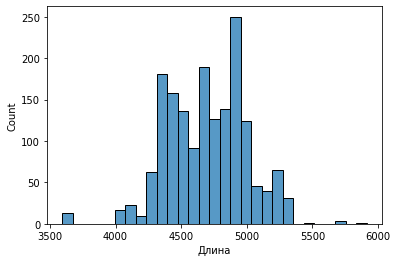

In [235]:
sns.histplot(df, x='Длина')

<AxesSubplot:xlabel='Ширина', ylabel='Count'>

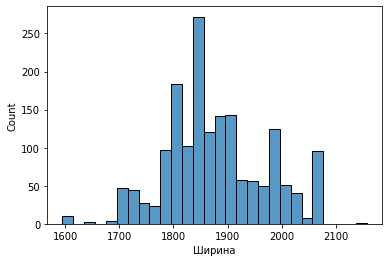

In [236]:
sns.histplot(df, x='Ширина')

<AxesSubplot:xlabel='Высота', ylabel='Count'>

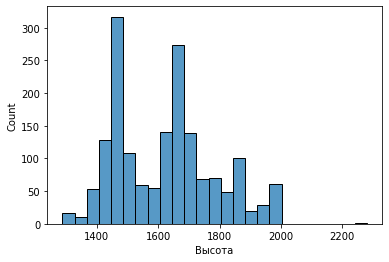

In [237]:
sns.histplot(df, x='Высота')

In [238]:
df[df['Высота']> 2000]

,seats,type_car,doors,Дорожный просвет,Колёсная база,Объём багажника,Объём багажника максимальный,Масса автомобиля,Длина,Ширина,Высота
1431,1,Вэн,3,185.0,3860,1935.0,1935.0,2125,5915,1950,2280.0


Аномалий вроде больше нет, можно потихоньку приступать к классифицикации

### 4. Классификация

В первую очередь, наверное стоит избавиться от признака "Объём багажника, так как у нас уже есть максмальный объём багажника"

Если я правильно понимаю задание, то нам нужно построить модель, которая отнесет все автомобили, кроме __Седанов__, __Хэтчбеков__, __Кроссоверов__ и __Внедорожников__, к одному из этих 4-х классов. Я бы очень хотел уточнить этот момент, но времени уже мало, поэтому попытаюсь решить именно эту задачу

Тогда перед нами стоит задача классификации, причём, у нас уже есть колонка `type_car`, где уже есть представители 4 классов, почему бы нам тогда не использовать эти авто в качестве обучающей выборки

In [248]:
df = pd.DataFrame(df.drop('Объём багажника', axis=1))

In [256]:
df.loc[df['type_car'].str.contains('кроссовер')]

,seats,type_car,doors,Дорожный просвет,Колёсная база,Объём багажника максимальный,Масса автомобиля,Длина,Ширина,Высота
117,5,Большой кроссовер,5,172.0,2928,1725.0,2555,4901,1935,1629.0
118,5,Большой кроссовер,5,172.0,2928,1725.0,2555,4901,1935,1629.0
119,5,Большой кроссовер,5,172.0,2928,1725.0,2555,4901,1935,1629.0
120,5,Большой кроссовер,5,172.0,2928,1725.0,2555,4901,1935,1629.0
121,5,Компактный кроссовер,5,170.0,2680,1525.0,1570,4485,1856,1585.0
...,...,...,...,...,...,...,...,...,...,...
1698,5,Большой кроссовер,5,237.0,2984,1899.0,1969,4950,2008,1776.0
1699,7,Большой кроссовер,5,237.0,2984,1899.0,2004,4950,2008,1776.0
1700,7,Большой кроссовер,5,237.0,2984,1899.0,2009,4950,2008,1776.0
1701,7,Большой кроссовер,5,237.0,2984,1899.0,2350,4950,2008,1776.0


In [254]:
df['type_car'].value_counts()

Компактный кроссовер         379
Среднеразмерный кроссовер    236
Большой внедорожник          129
Большой кроссовер            115
Седан класса E               104
                            ... 
Купе класса C                  3
Спортседан класса D            2
Купе класса E                  2
Минивэн                        2
Спортседан класса E            2
Name: type_car, Length: 37, dtype: int64

Те машины, которые сожержат в названии своего типа слова "седан", "внедорожник", "кроссовер", "хэтчбек" - элементы обучающей выборки, остальные - тренировочная

In [257]:
train_data = pd.DataFrame(df.loc[df['type_car'].str.contains('Седан|Внедорожник|Кроссовер|Хэтчбек', case=False)])

In [258]:
train_data

,seats,type_car,doors,Дорожный просвет,Колёсная база,Объём багажника максимальный,Масса автомобиля,Длина,Ширина,Высота
0,5,Седан класса C,4,165.0,2637,880.0,1320,4458,1796,1416.0
1,5,Седан класса C,4,165.0,2637,880.0,1320,4458,1796,1416.0
2,5,Седан класса C,4,165.0,2637,880.0,1395,4458,1796,1416.0
3,5,Седан класса C,4,165.0,2637,845.0,1465,4458,1796,1416.0
4,5,Седан класса C,4,165.0,2637,880.0,1395,4458,1796,1416.0
...,...,...,...,...,...,...,...,...,...,...
1698,5,Большой кроссовер,5,237.0,2984,1899.0,1969,4950,2008,1776.0
1699,7,Большой кроссовер,5,237.0,2984,1899.0,2004,4950,2008,1776.0
1700,7,Большой кроссовер,5,237.0,2984,1899.0,2009,4950,2008,1776.0
1701,7,Большой кроссовер,5,237.0,2984,1899.0,2350,4950,2008,1776.0


In [261]:
test_data = pd.DataFrame(df.loc[df['type_car'].str.contains('Седан|Внедорожник|Кроссовер|Хэтчбек', case=False) == False])

In [262]:
test_data

,seats,type_car,doors,Дорожный просвет,Колёсная база,Объём багажника максимальный,Масса автомобиля,Длина,Ширина,Высота
24,5,Универсал повышенной проходимости класса D,5,180.0,2820,1480.0,1685,4762,1847,1493.0
25,5,Универсал повышенной проходимости класса D,5,180.0,2820,1480.0,1685,4762,1847,1493.0
26,5,Универсал класса D,5,160.0,2820,1480.0,1595,4762,1847,1426.0
27,5,Универсал класса D,5,160.0,2820,1480.0,1595,4762,1847,1426.0
28,5,Универсал класса D,5,160.0,2820,1480.0,1595,4762,1847,1426.0
...,...,...,...,...,...,...,...,...,...,...
1650,5,Универсал повышенной проходимости класса E,5,210.0,2941,1526.0,1920,4939,1879,1543.0
1651,5,Универсал повышенной проходимости класса E,5,210.0,2941,1526.0,1920,4939,1879,1543.0
1652,5,Универсал повышенной проходимости класса E,5,210.0,2941,1526.0,1920,4939,1879,1543.0
1653,5,Универсал повышенной проходимости класса E,5,210.0,2941,1526.0,1920,4939,1879,1543.0


In [266]:
train_data.shape[0] + test_data.shape[0] == df.shape[0]

True

In [419]:
train_data.shape[0]/df.shape[0]

0.8643570170287728

Обучающая выборка составляет 86.5% от ген. совокупности, что, можно сказать, в пределах нормы

Укажем числовые значения каждого класса

In [286]:
sedans = list(train_data[train_data['type_car'].str.contains('Седан', case=False)]['type_car'].unique())

In [287]:
hatchbacks = list(train_data[train_data['type_car'].str.contains('Хэтчбек', case=False)]['type_car'].unique())

In [289]:
cross = list(train_data[train_data['type_car'].str.contains('Кроссовер', case=False)]['type_car'].unique())

In [291]:
outlanders = list(train_data[train_data['type_car'].str.contains('Внедорожник', case=False)]['type_car'].unique())

In [292]:
outlanders

['Большой внедорожник', 'Внедорожник класса B', 'Среднеразмерный внедорожник']

In [293]:
def add_target(x):
    if x in sedans:
        return 1
    elif x in hatchbacks:
        return 2
    elif x in cross:
        return 3
    elif x in outlanders:
        return 4
    else:
        return 0

In [294]:
train_data['target'] = train_data['type_car'].map(add_target)

In [296]:
train_data['target'].value_counts()

3    754
1    416
4    174
2    128
Name: target, dtype: int64

In [299]:
train_data_types = pd.Series(train_data['type_car'])

In [301]:
train_data = pd.DataFrame(train_data.drop('type_car', axis=1))

In [302]:
train_data.head()

,seats,doors,Дорожный просвет,Колёсная база,Объём багажника максимальный,Масса автомобиля,Длина,Ширина,Высота,target
0,5,4,165.0,2637,880.0,1320,4458,1796,1416.0,1
1,5,4,165.0,2637,880.0,1320,4458,1796,1416.0,1
2,5,4,165.0,2637,880.0,1395,4458,1796,1416.0,1
3,5,4,165.0,2637,845.0,1465,4458,1796,1416.0,1
4,5,4,165.0,2637,880.0,1395,4458,1796,1416.0,1


In [303]:
test_data_types = pd.Series(test_data['type_car'])

In [304]:
test_data = pd.DataFrame(test_data.drop('type_car', axis=1))

In [305]:
train_data_types

0          Седан класса C
1          Седан класса C
2          Седан класса C
3          Седан класса C
4          Седан класса C
              ...        
1698    Большой кроссовер
1699    Большой кроссовер
1700    Большой кроссовер
1701    Большой кроссовер
1702    Большой кроссовер
Name: type_car, Length: 1472, dtype: object

In [306]:
test_data_types

24      Универсал повышенной проходимости класса D
25      Универсал повышенной проходимости класса D
26                              Универсал класса D
27                              Универсал класса D
28                              Универсал класса D
                           ...                    
1650    Универсал повышенной проходимости класса E
1651    Универсал повышенной проходимости класса E
1652    Универсал повышенной проходимости класса E
1653    Универсал повышенной проходимости класса E
1654    Универсал повышенной проходимости класса E
Name: type_car, Length: 231, dtype: object

Первым делом, я хочу поработать рандомным деревом решений

In [307]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, max_leaf_nodes=30)

In [308]:
X_train = pd.DataFrame(train_data.drop('target', axis=1))

In [309]:
y_train = pd.Series(train_data['target'])

In [310]:
X_train

,seats,doors,Дорожный просвет,Колёсная база,Объём багажника максимальный,Масса автомобиля,Длина,Ширина,Высота
0,5,4,165.0,2637,880.0,1320,4458,1796,1416.0
1,5,4,165.0,2637,880.0,1320,4458,1796,1416.0
2,5,4,165.0,2637,880.0,1395,4458,1796,1416.0
3,5,4,165.0,2637,845.0,1465,4458,1796,1416.0
4,5,4,165.0,2637,880.0,1395,4458,1796,1416.0
...,...,...,...,...,...,...,...,...,...
1698,5,5,237.0,2984,1899.0,1969,4950,2008,1776.0
1699,7,5,237.0,2984,1899.0,2004,4950,2008,1776.0
1700,7,5,237.0,2984,1899.0,2009,4950,2008,1776.0
1701,7,5,237.0,2984,1899.0,2350,4950,2008,1776.0


In [311]:
y_train

0       1
1       1
2       1
3       1
4       1
       ..
1698    3
1699    3
1700    3
1701    3
1702    3
Name: target, Length: 1472, dtype: int64

In [312]:
forest.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=10)

После первого прогона тестовой выборки оказалось, что у двух строк есть НаНы. Это было связано с тем, что изначально в датасете у этих машин был Дорожный просвет равный нулю, а машин такого типа, кроме этих двух нет

In [329]:
test_data.isna().any()

seats                           False
doors                           False
Дорожный просвет                 True
Колёсная база                   False
Объём багажника максимальный    False
Масса автомобиля                False
Длина                           False
Ширина                          False
Высота                          False
dtype: bool

In [338]:
data.loc[test_data[test_data['Дорожный просвет'].isna()].index]

,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,...,Разгон до сотни,Максимальная скорость,Расход топлива (л/100 км)\nгород / трасса / смешанный,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
1017,Mercedes-Benz,E Coupe,E 200 4MATIC Sport,Купе класса E,4,2,бензиновый (1991 см³),197 л. с.,320 Н·м,автоматическая (9 ступеней),...,7.6 секунды,231 км/ч,9.3 / 5.6 / 6.7,0 мм,4835 × 1860 × 1438,2873 мм,405 л,405 л,66 л,1740 кг
1018,Mercedes-Benz,E Coupe,E 300 Sport,Купе класса E,4,2,бензиновый (1991 см³),249 л. с.,370 Н·м,автоматическая (9 ступеней),...,6.4 секунды,232 км/ч,9.3 / 5.8 / 7.1,0 мм,4835 × 1860 × 1438,2873 мм,405 л,405 л,66 л,1705 кг


Это машины класса купе, добавим им просвет как у седанов

In [343]:
mean_for_sedans = df.loc[df['type_car'].isin(sedans)]['Дорожный просвет'].mean()
test_data.loc[1017:1018, 'Дорожный просвет'] = mean_for_sedans

In [344]:
test_data.loc[1017:1018, 'Дорожный просвет']

1017    150.472112
1018    150.472112
Name: Дорожный просвет, dtype: float64

In [346]:
forest.predict(test_data)

array([3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4,
       4, 4, 1, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3])

In [347]:
y_predicted = forest.predict(test_data)

In [352]:
len(y_predicted)

231

In [348]:
test_data['target'] = y_predicted

In [349]:
test_data.head()

,seats,doors,Дорожный просвет,Колёсная база,Объём багажника максимальный,Масса автомобиля,Длина,Ширина,Высота,target
24,5,5,180.0,2820,1480.0,1685,4762,1847,1493.0,3
25,5,5,180.0,2820,1480.0,1685,4762,1847,1493.0,3
26,5,5,160.0,2820,1480.0,1595,4762,1847,1426.0,2
27,5,5,160.0,2820,1480.0,1595,4762,1847,1426.0,2
28,5,5,160.0,2820,1480.0,1595,4762,1847,1426.0,2


###### Вспомним какое число что значит
1 - Седаны  
2 - Хэтчбеки  
3 - Кроссоверы  
4 - Внедорожник

In [350]:
dict(zip(test_data_types, y_predicted))

{'Универсал повышенной проходимости класса D': 3,
 'Универсал класса D': 2,
 'Купе класса D': 1,
 'Универсал класса E': 2,
 'Купе класса C': 1,
 'Спорткупе': 1,
 'Кабриолет с мягкой крышей': 1,
 'Спорткупе класса D': 1,
 'Родстер': 1,
 'Вэн': 4,
 'Универсал класса C': 2,
 'Купе класса E': 1,
 'Пикап': 3,
 'Минивэн': 3,
 'Компактвэн': 3,
 'Универсал повышенной проходимости класса E': 3}

In [351]:
test_data_types

24      Универсал повышенной проходимости класса D
25      Универсал повышенной проходимости класса D
26                              Универсал класса D
27                              Универсал класса D
28                              Универсал класса D
                           ...                    
1650    Универсал повышенной проходимости класса E
1651    Универсал повышенной проходимости класса E
1652    Универсал повышенной проходимости класса E
1653    Универсал повышенной проходимости класса E
1654    Универсал повышенной проходимости класса E
Name: type_car, Length: 231, dtype: object

In [353]:
test_data['type'] = test_data_types

In [356]:
pd.set_option('display.max_rows', 231)
test_data.loc[:, ['type', 'target']]

,type,target
24,Универсал повышенной проходимости класса D,3
25,Универсал повышенной проходимости класса D,3
26,Универсал класса D,2
27,Универсал класса D,2
28,Универсал класса D,2
29,Универсал класса D,2
30,Универсал класса D,2
31,Универсал класса D,2
32,Универсал класса D,2
33,Универсал класса D,2


Если посмотреть на то, как алгоритм калссифицировал эти типы автомобилей, исходя из собственного представления об авто, то можно сказать, что алгоритм довольно хорошо справился с задачей

Попробуем посмотреть как бы алгоритм классифицировал данные из тренирочного набора. Хотя такое делать не очень имеет смысл, но хоть посмотрим, что да как

In [358]:
forest.predict(X_train)

array([1, 1, 1, ..., 3, 3, 3])

In [360]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, forest.predict(X_train))

array([[416,   0,   0,   0],
       [  0, 128,   0,   0],
       [  0,   0, 754,   0],
       [  0,   0,   0, 174]])

Попробуем еще кластеризацию  
Можем даже попробовать тут решить задачу обучения без учителя - использовать K-Means

In [361]:
from sklearn.cluster import KMeans

In [388]:
cls = KMeans(n_clusters=4, n_init=15)

In [365]:
df.loc[1017:1018, 'Дорожный просвет'] = mean_for_sedans

In [366]:
df.isna().any()

seats                           False
type_car                        False
doors                           False
Дорожный просвет                False
Колёсная база                   False
Объём багажника максимальный    False
Масса автомобиля                False
Длина                           False
Ширина                          False
Высота                          False
dtype: bool

In [367]:
df.head()

,seats,type_car,doors,Дорожный просвет,Колёсная база,Объём багажника максимальный,Масса автомобиля,Длина,Ширина,Высота
0,5,Седан класса C,4,165.0,2637,880.0,1320,4458,1796,1416.0
1,5,Седан класса C,4,165.0,2637,880.0,1320,4458,1796,1416.0
2,5,Седан класса C,4,165.0,2637,880.0,1395,4458,1796,1416.0
3,5,Седан класса C,4,165.0,2637,845.0,1465,4458,1796,1416.0
4,5,Седан класса C,4,165.0,2637,880.0,1395,4458,1796,1416.0


In [410]:
X_clustering = pd.DataFrame(df.drop('type_car', axis=1))

In [411]:
cls.fit(X_clustering)

KMeans(n_clusters=4, n_init=15)

In [412]:
cls.labels_

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

In [413]:
X_clustering['target'] = cls.labels_

In [414]:
X_clustering['target'].value_counts()

3    569
1    569
0    506
2     59
Name: target, dtype: int64

In [415]:
X_clustering['types'] = df['type_car']

In [416]:
X_clustering.loc[:, ['types', 'target']]

,types,target
0,Седан класса C,3
1,Седан класса C,3
2,Седан класса C,3
3,Седан класса C,1
4,Седан класса C,3
...,...,...
1698,Большой кроссовер,0
1699,Большой кроссовер,0
1700,Большой кроссовер,0
1701,Большой кроссовер,0


Даже по этому превью можно сделать вывод, что результат так себе. Одни и те же седаны попали в разны кластеры. Да и сама кластеризация для данной задачи мало подходит. Необходимо еще сидеть с данными после кластеризации, чтобы понять, что значит каждый кластер

# Выводы по работе
- Я очень надеюсь, что я правильно понял поставленную передо мной задачу. Если бы было больше времени или у меня была возможность поговорить с "заказчиком", то я бы узнал точнее, что от меня требовалось. Из данной тетрадки в принципе уже видно, что я бы справился с той задачей, которую мне бы сказали решить
- В качестве модели я выбрал случайный лес, так как это достаточно универсальный и мощный алгоритм классификации, пробежавшись по результатам уже можно было сделать вывод, что одного алгоритма тут было достаточно, хотя разумеется можно было "тюнить" модель с помощью GridSearchCV или использовать Стекинг (т.е. использовать несколько алгоритмов и затем решающий алгоритм)
- По заданию мне нужно придумать метрику моей классфикации, в данной задаче это довольно сложно. Я лично не уверен, что вообще правильно понял задачу. Например, мне тут не представляется возможным оценить результаты на тестовой выборке, кроме как "на глаз". На обучающей выборке алгоритм сработал без ошибок (см. confusion_matrix), хотя это не показатель, никто не отменял оферфиттинг в деревьях решений. Я бы попробовал собрать "мнение со стороны" (т.е. попросил бы живых людей классифицировать условный минивэн как внедорожник или кроссовер), чтобы понять, хорошо ли сработал алгоритм на тестовой выборке
- Кластеризация тут так себе. Алгоритму кластеризации тут необходимо еще лезть в дебри (в н-мерное пространство)